# Exploratory Data Analysis in Python

# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to provide you some important information before we build model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import itertools
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import FreqDist
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/enze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/enze/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/enze/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/enze/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/enze/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
pizza_business = pd.read_csv("data/pizza_business.csv")
pizza_review = pd.read_csv("data/pizza_review.csv")
pizza_tip = pd.read_csv("data/pizza_tip.csv")
pizza_user = pd.read_csv("data/pizza_user.csv")

In [3]:
pizza_review

Unnamed: 0               review_id                 user_id  \
0               0  hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw   
1               1  EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw   
2               2  RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg   
3               3  0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw   
4               4  sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg   
...           ...                     ...                     ...   
67165       67165  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog   
67166       67166  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA   
67167       67167  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA   
67168       67168  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w   
67169       67169  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw   

                  business_id  stars  useful  funny  cool  \
0      J9f-9Prw2YVM-fiZqv2fmQ      2       0      1     1   
1      lpel3pRFAzlow7u2TJMz4Q      4       3      0     0   
2      Zja7ykq3icDzkN20XX6j1w      5       1      0     1   
3      hr0vxeTzlHx6fTpSSmu2AA      5       1      0     0   
4      F4kjKxXXyn3e-BYVb1mWcg      4       0      0     0   
...                       ...    ...     ...    ...   ...   
67165  nR3u-wQ99bop6IdGoU38KQ      1       1      0     0   
67166  yT1Ad3auuw1jAJEZHr7Yqw      5       1      1     1   
67167  R13VkcyUIU3xG2fRFbBvBA      4       3      3     3   
67168  M-caugKzJ9qLOmCBfD9Nyg      1       1      0     0   
67169  o_dWM_hlpgjjd7F15UPjZw      3       0      0     0   

                                                    text                 date  
0      Parking is tough to get here so I don't get to...  2013-09-04 04:35:27  
1      The server had an extensive knowledge of wines...  2015-04-28 19:28:12  
2      Fast Forward\n\nEvery trip from NYC to Pitt in...  2013-07-12 23:08:35  
3      By far my favorite Cleveland/Akron restaurant!...  2013-12-07 01:09:23  
4      All food is good here I usually get the Italia...  2014-10-27 01:42:40  
...                                                  ...                  ...  
67165  I'm originally from the other side of Ohio and...  2019-09-21 00:24:03  
67166  Yes, yes, YES!! We loved going to the place in...  2019-09-03 04:32:16  
67167  Went here for a lunch meeting amidst s typical...  2019-12-11 16:18:26  
67168  My wife and I have eaten at La Brioche at leas...  2017-06-13 02:14:53  
67169  First let me say Lindys in Columbus is one of ...  2019-11-16 14:37:10  

[67170 rows x 10 columns]

In [4]:
pizza_business=pizza_business.rename(columns={'stars':'business_stars'})
pizza_business

Unnamed: 0             business_id                        name  \
0              0  ZkzutF0P_u0C0yTulwaHkA            Lelulos Pizzeria   
1              1  39lLJK_rrYY2NYomSsQdUA               Marco's Pizza   
2              2  0y6alZmSLnPzmG5_kP5Quw                 J J's Pizza   
3              3  _Kp1IPTi17wBywYOd30raA                   Pizza Hut   
4              4  crBw_Hq3gCkppirgjnIl4A         Famous Yeti's Pizza   
...          ...                     ...                         ...   
1555        1555  Qtv6iGDAHBmAKBgl40JgLw     Blaze Fast-Fire'd Pizza   
1556        1556  ZZGs9idRiKRHue2RyXw9uA               Marco's Pizza   
1557        1557  v8GgrqLTs_NZZl2tkyvOgA  Cleveland Clinic Cafeteria   
1558        1558  qWcaGio9JsqrvgmQiIRtIQ         Country Style Pizza   
1559        1559  AlwKuzyrrxlZ04ktebwmcA                   Pizza Pit   

                            address              city   latitude  longitude  \
0               311 Unity Center Rd        Pittsburgh  40.489996 -79.779288   
1                24335 Chagrin Blvd         Cleveland  41.465789 -81.506349   
2                   20542 Lorain Rd         Cleveland  41.448341 -81.847644   
3              8609 University Blvd        Pittsburgh  40.507268 -80.222632   
4                     971 N Page St           Madison  42.926526 -89.222592   
...                             ...               ...        ...        ...   
1555            2610 N Prospect Ave  Urbana-Champaign  40.147209 -88.254940   
1556              5877 Broadview Rd         Cleveland  41.403398 -81.689779   
1557  9500 Euclid Ave, Bldg C, Fl 1         Cleveland  41.501753 -81.621448   
1558                  536 Dewey Ave        Pittsburgh  40.356300 -80.110600   
1559                    13 Atlas Ct           Madison  43.086793 -89.306868   

      business_stars  review_count  \
0                4.0            31   
1                2.5            11   
2                4.5            21   
3                2.0            14   
4                4.5            60   
...              ...           ...   
1555             3.5            55   
1556             3.0            10   
1557             3.0            12   
1558             4.0            39   
1559             2.5            19   

                                             categories  ...  \
0                                    Restaurants, Pizza  ...   
1                                    Restaurants, Pizza  ...   
2                           Pizza, Italian, Restaurants  ...   
3            Restaurants, Pizza, Chicken Wings, Italian  ...   
4                                    Restaurants, Pizza  ...   
...                                                 ...  ...   
1555               Fast Food, Restaurants, Pizza, Salad  ...   
1556           Chicken Wings, Restaurants, Pizza, Salad  ...   
1557  Bakeries, Food, Do-It-Yourself Food, Restauran...  ...   
1558     Food, Restaurants, Bakeries, Pizza, Sandwiches  ...   
1559  Shopping, Party & Event Planning, Caterers, To...  ...   

     BusinessParking_valet BusinessParking_validated BusinessParking  \
0                    False                     False             NaN   
1                      NaN                       NaN             NaN   
2                    False                     False             NaN   
3                    False                     False             lot   
4                    False                     False             lot   
...                    ...                       ...             ...   
1555                 False                     False             NaN   
1556                 False                     False             NaN   
1557                 False                     False             NaN   
1558                 False                     False          street   
1559                 False                     False             NaN   

       GoodForMeal GoodForMeal_breakfast GoodForMeal_brunch  \
0              NaN                   N

In [5]:
pizza_review_business=pd.merge(pizza_review, pizza_business, how='left', on='business_id')
pizza_review_business

Unnamed: 0_x               review_id                 user_id  \
0                 0  hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw   
1                 1  EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw   
2                 2  RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg   
3                 3  0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw   
4                 4  sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg   
...             ...                     ...                     ...   
67165         67165  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog   
67166         67166  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA   
67167         67167  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA   
67168         67168  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w   
67169         67169  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw   

                  business_id  stars  useful  funny  cool  \
0      J9f-9Prw2YVM-fiZqv2fmQ      2       0      1     1   
1      lpel3pRFAzlow7u2TJMz4Q      4       3      0     0   
2      Zja7ykq3icDzkN20XX6j1w      5       1      0     1   
3      hr0vxeTzlHx6fTpSSmu2AA      5       1      0     0   
4      F4kjKxXXyn3e-BYVb1mWcg      4       0      0     0   
...                       ...    ...     ...    ...   ...   
67165  nR3u-wQ99bop6IdGoU38KQ      1       1      0     0   
67166  yT1Ad3auuw1jAJEZHr7Yqw      5       1      1     1   
67167  R13VkcyUIU3xG2fRFbBvBA      4       3      3     3   
67168  M-caugKzJ9qLOmCBfD9Nyg      1       1      0     0   
67169  o_dWM_hlpgjjd7F15UPjZw      3       0      0     0   

                                                    text                 date  \
0      Parking is tough to get here so I don't get to...  2013-09-04 04:35:27   
1      The server had an extensive knowledge of wines...  2015-04-28 19:28:12   
2      Fast Forward\n\nEvery trip from NYC to Pitt in...  2013-07-12 23:08:35   
3      By far my favorite Cleveland/Akron restaurant!...  2013-12-07 01:09:23   
4      All food is good here I usually get the Italia...  2014-10-27 01:42:40   
...                                                  ...                  ...   
67165  I'm originally from the other side of Ohio and...  2019-09-21 00:24:03   
67166  Yes, yes, YES!! We loved going to the place in...  2019-09-03 04:32:16   
67167  Went here for a lunch meeting amidst s typical...  2019-12-11 16:18:26   
67168  My wife and I have eaten at La Brioche at leas...  2017-06-13 02:14:53   
67169  First let me say Lindys in Columbus is one of ...  2019-11-16 14:37:10   

       ...  BusinessParking_valet BusinessParking_validated BusinessParking  \
0      ...                  False                     False          street   
1      ...                  False                     False      lot street   
2      ...                  False                     False          street   
3      ...                  False                     False             lot   
4      ...                  False                     False             lot   
...    ...                    ...                       ...             ...   
67165  ...                  False                     False             lot   
67166  ...                  False                     False             lot   
67167  ...                  False                     False             lot   
67168  ...                  False                     False             lot   
67169  ...                  False                     False             NaN   

                    GoodForMeal  GoodForMeal_breakfast  GoodForMeal_brunch  \
0               latenight lunch                  False               False   
1      latenight dessert dinner                  False               False   
2                  lunch dinner                  False               False   
3                        dinner                  False               False   
4                           NaN                    NaN                 NaN   
...                         ...

In [6]:
pizza_review_business=pizza_review_business.drop(["Unnamed: 0_x","Unnamed: 0_y","useful","funny","cool"],axis=1)

In [7]:
pizza_review_business

review_id                 user_id             business_id  \
0      hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw  J9f-9Prw2YVM-fiZqv2fmQ   
1      EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw  lpel3pRFAzlow7u2TJMz4Q   
2      RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg  Zja7ykq3icDzkN20XX6j1w   
3      0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw  hr0vxeTzlHx6fTpSSmu2AA   
4      sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg  F4kjKxXXyn3e-BYVb1mWcg   
...                       ...                     ...                     ...   
67165  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog  nR3u-wQ99bop6IdGoU38KQ   
67166  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA  yT1Ad3auuw1jAJEZHr7Yqw   
67167  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA  R13VkcyUIU3xG2fRFbBvBA   
67168  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w  M-caugKzJ9qLOmCBfD9Nyg   
67169  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw  o_dWM_hlpgjjd7F15UPjZw   

       stars                                               text  \
0          2  Parking is tough to get here so I don't get to...   
1          4  The server had an extensive knowledge of wines...   
2          5  Fast Forward\n\nEvery trip from NYC to Pitt in...   
3          5  By far my favorite Cleveland/Akron restaurant!...   
4          4  All food is good here I usually get the Italia...   
...      ...                                                ...   
67165      1  I'm originally from the other side of Ohio and...   
67166      5  Yes, yes, YES!! We loved going to the place in...   
67167      4  Went here for a lunch meeting amidst s typical...   
67168      1  My wife and I have eaten at La Brioche at leas...   
67169      3  First let me say Lindys in Columbus is one of ...   

                      date                          name  \
0      2013-09-04 04:35:27         Original Hot Dog Shop   
1      2015-04-28 19:28:12               Humble Wine Bar   
2      2013-07-12 23:08:35                Aiello's Pizza   
3      2013-12-07 01:09:23                       Russo's   
4      2014-10-27 01:42:40  Tnt Dynamite Pizza & Hoagies   
...                    ...                           ...   
67165  2019-09-21 00:24:03                   Jet's Pizza   
67166  2019-09-03 04:32:16                    Mercurio’s   
67167  2019-12-11 16:18:26                    56 Kitchen   
67168  2017-06-13 02:14:53          La Brioche True Food   
67169  2019-11-16 14:37:10           Lindey's Lake House   

                       address        city   latitude  ...  \
0              3901 Forbes Ave  Pittsburgh  40.442147  ...   
1            15400 Detroit Ave   Cleveland  41.485075  ...   
2              2112 Murray Ave  Pittsburgh  40.433261  ...   
3                4895 State Rd   Cleveland  41.202242  ...   
4            450 Pittsburgh St  Pittsburgh  40.540954  ...   
...                        ...         ...        ...  ...   
67165  35535 Euclid Ave, Ste 8   Cleveland  41.626690  ...   
67166         1335 Freeport Rd  Pittsburgh  40.489726  ...   
67167          1433 Som Ctr Rd   Cleveland  41.521496  ...   
67168      2862 University Ave     Madison  43.075354  ...   
67169  2101 Richmond Rd, Ste L   Cleveland  41.500783  ...   

       BusinessParking_valet  BusinessParking_validated  BusinessParking  \
0                      False                      False           street   
1                      False                      False       lot street   
2                      False                      False           street   
3                      False                      False              lot   
4                      False                      False              lot   
...                      ...                        ...              ...   
67165                  False                      False              lot   
67166                  False                      False              lot   
67167                  False                      False              lot   
67168           

# Location

In [8]:
City=pizza_review_business['city'].tolist()
Location=['Pittsburgh','Cleveland','Madison','Urbana-Champaign']
Count=[City.count('Pittsburgh'),City.count('Cleveland'),City.count('Madison'),City.count('Urbana-Champaign')]

In [9]:
Location_Count=pd.DataFrame(list(zip(Location,Count)),columns=['Location','Count'])
Location_Count

Location  Count
0        Pittsburgh  29324
1         Cleveland  26666
2           Madison   8686
3  Urbana-Champaign   2494

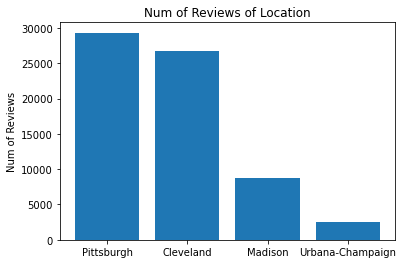

In [10]:
plt.title('Num of Reviews of Location')
plt.ylabel('Num of Reviews')
plt.bar(Location,height=Count)
plt.savefig('figure/Num_of_Reviews_of_Location.png')

Most of reviews are from Pittsburgh and Cleveland. 

# Stars

In [11]:
set(pizza_review_business['stars'])

{1, 2, 3, 4, 5}

In [12]:
Stars=["1","2","3","4","5"]
pizza_review_business['stars'].tolist().count(1)

9829

In [13]:
pizza_review_business['stars'].tolist().count(5)

26775

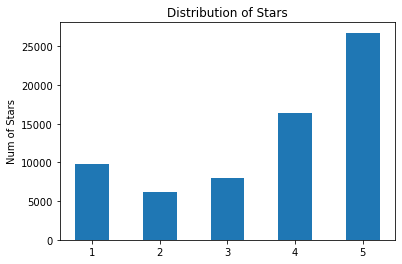

In [14]:
plt.title('Distribution of Stars')
plt.ylabel('Num of Stars')
plt.hist(pizza_review_business['stars'],bins =[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
plt.xticks([1,2,3,4,5])
plt.savefig('figure/Distribution_of_Stars.png')

The distribution of stars is polarization

# Stars & Location

In [15]:

star_Madison=pizza_review_business[pizza_review_business['city']=='Madison']['stars'].array

star_Cleveland=pizza_review_business[pizza_review_business['city']=='Cleveland']['stars'].array

star_Pittsburgh=pizza_review_business[pizza_review_business['city']=='Pittsburgh']['stars'].array

star_Urbana_Champaign=pizza_review_business[pizza_review_business['city']=='Urbana-Champaign']['stars'].array

In [16]:
star_city=[star_Madison,star_Cleveland,star_Pittsburgh,star_Urbana_Champaign]

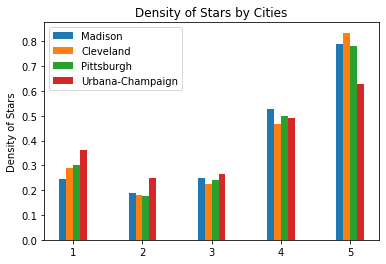

In [17]:

plt.hist(star_city,bins =[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], histtype='bar',density='bool',label=['Madison','Cleveland','Pittsburgh','Urbana-Champaign'])
plt.legend(prop={'size': 10})
plt.title('Density of Stars by Cities')
plt.ylabel('Density of Stars')
plt.savefig('figure/Density_of_Stars.png')

This picture show you the density of stars by different cities, as you can see, the Madison has the smallest proportion of 1 star and Cleveland has the largest proportion of 5 stars in their own distribution of stars. 

# Time

In [18]:
DateTime=pizza_review_business['date'].tolist()
Date=[]
for i in DateTime:
    Date.append(i[0:7])
Review_ByDate=pizza_review_business[['date','stars']]
Review_ByDate["Date"]=Date

/Users/enze/opt/anaconda3/envs/STAT628/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
Date=list(set(Date))

In [20]:
All_Date=pd.DataFrame(Date,columns=['Date']).sort_values(by=['Date'])

In [21]:
All_Date.reset_index(drop=True, inplace=True)

In [22]:
Review_ByDateStar=Review_ByDate.groupby(['stars', 'Date']).size().reset_index(name='counts')
Star1=Review_ByDateStar[Review_ByDateStar["stars"]==1]
Star1=Star1.rename(columns={'counts':'Star1'})
Star1=Star1.drop(["stars"],axis=1)
Star2=Review_ByDateStar[Review_ByDateStar["stars"]==2]
Star2=Star2.rename(columns={'counts':'Star2'})
Star2=Star2.drop(["stars"],axis=1)
Star3=Review_ByDateStar[Review_ByDateStar["stars"]==3]
Star3=Star3.rename(columns={'counts':'Star3'})
Star3=Star3.drop(["stars"],axis=1)
Star4=Review_ByDateStar[Review_ByDateStar["stars"]==4]
Star4=Star4.rename(columns={'counts':'Star4'})
Star4=Star4.drop(["stars"],axis=1)
Star5=Review_ByDateStar[Review_ByDateStar["stars"]==5]
Star5=Star5.rename(columns={'counts':'Star5'})
Star5=Star5.drop(["stars"],axis=1)

In [23]:
All_data=pd.merge(All_Date, Star1, how='left', on='Date')
All_data=pd.merge(All_data, Star2, how='left', on='Date')
All_data=pd.merge(All_data, Star3, how='left', on='Date')
All_data=pd.merge(All_data, Star4, how='left', on='Date')
All_data=pd.merge(All_data, Star5, how='left', on='Date')

In [24]:
All_data.sort_values(by=['Date'])
All_data

Date  Star1  Star2  Star3  Star4  Star5
0    2004-10    NaN    NaN    NaN    2.0    1.0
1    2005-03    NaN    NaN    1.0    1.0    2.0
2    2005-04    NaN    NaN    NaN    1.0    NaN
3    2005-05    NaN    NaN    1.0    NaN    3.0
4    2005-10    NaN    1.0    1.0    5.0    3.0
..       ...    ...    ...    ...    ...    ...
170  2019-08  180.0  103.0  130.0  217.0  492.0
171  2019-09  168.0   88.0   96.0  183.0  423.0
172  2019-10  186.0   72.0  116.0  184.0  391.0
173  2019-11  124.0   72.0   70.0  160.0  360.0
174  2019-12   70.0   28.0   38.0   60.0  148.0

[175 rows x 6 columns]

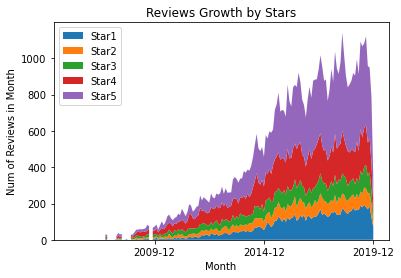

In [25]:
All_Date=All_data["Date"].tolist()
All_Star1=All_data["Star1"].tolist()
All_Star2=All_data["Star2"].tolist()
All_Star3=All_data["Star3"].tolist()
All_Star4=All_data["Star4"].tolist()
All_Star5=All_data["Star5"].tolist()
plt.stackplot(All_Date,All_Star1,All_Star2,All_Star3,All_Star4,All_Star5, labels=["Star1","Star2","Star3","Star4","Star5"])
plt.xticks(['2009-12','2014-12','2019-12'])
plt.legend(loc='upper left')
plt.title('Reviews Growth by Stars')
plt.ylabel('Num of Reviews in Month')
plt.xlabel('Month')
plt.savefig('figure/Reviews_Growth_by_Stars.png')

As you can see, most of our reviews are from 2014 to 2019. 

# Word Frequence

In [26]:
Review=pizza_review_business["text"]

In [27]:
stop_words = stopwords.words('english')
stop_words.extend(["'s","n't","'ve","'m","'re","'d","'ll"])

In [28]:
string.punctuation
newstring_punctuation=string.punctuation+"...''``..--"
newstring_punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...\'\'``..--'

In [29]:
Word_Cloud_review=[]
All_Word=[]
for i in range(len(Review)):
    review=Review[i]
    review=review.lower()
    review=nltk.word_tokenize(review)
    review=[lmtzr.lemmatize(i) for i in review]
    review=[i for i in review if i not in string.punctuation]
    review=[i for i in review if i not in stop_words]
    review=[i for i in review if len(i)>1]
    review=[i for i in review if i.isdigit() is False]
    review=[i for i in review if any(c.isalpha() for c in i) is True]
    All_Word.extend(review)
    Word_Cloud_review.append(" ".join(review))

In [30]:
pizza_review_business["clean_review"]=Word_Cloud_review

We only consider words occur more than 30 times

In [31]:
freqdist=FreqDist(All_Word)
Word_Freq=pd.DataFrame(list(freqdist.items()), columns = ["Word","Frequency"])
Word_Freq=Word_Freq.sort_values(by=['Frequency'],ascending=False)
Word_Freq=Word_Freq[Word_Freq["Frequency"]>30]

In [32]:
Word_Freq[0:100]

Word  Frequency
55       wa     127431
92    pizza      98237
24     good      40352
300   place      37016
135    food      35068
..      ...        ...
870     new       5868
82   server       5857
66    large       5855
208   pasta       5814
760  flavor       5767

[100 rows x 2 columns]

In [49]:
Word_Freq.to_csv('data/Word_Freq.csv')

# Positive Words & Negative Words

Find all words with positive view and negative words by nltk

In [33]:
SIA=SentimentIntensityAnalyzer()
Positive_Word=[]
Negative_Word=[]
for i in Word_Freq['Word']:
    if (SIA.polarity_scores(i)['compound']) >= 0.5:
        Positive_Word.append(i)
    elif (SIA.polarity_scores(i)['compound']) <= -0.5:
        Negative_Word.append(i)
    

In [34]:
Positive_Word

['great',
 'best',
 'delicious',
 'love',
 'amazing',
 'excellent',
 'awesome',
 'perfect',
 'super',
 'happy',
 'kind',
 'enjoyed',
 'fantastic',
 'loved',
 'free',
 'wonderful',
 'perfectly',
 'fun',
 'yummy',
 'pleasant',
 'wow',
 'generous',
 'outstanding',
 'beautiful',
 'perfection',
 'comfortable',
 'fabulous',
 'lovely',
 'lover',
 'positive',
 'rich',
 'honest',
 'strong',
 'appreciated',
 'enjoying',
 'impressive',
 'heaven',
 'courteous',
 'superb',
 'trust',
 'bonus',
 'delightful',
 'luckily',
 'supreme',
 'winner',
 'win',
 'award',
 'pleasure',
 'greatest',
 'celebrate',
 'heavenly',
 'charming',
 'gorgeous',
 'divine',
 'delight',
 'happily',
 'beautifully',
 'kudos',
 'delectable',
 'winning',
 'superior',
 'reward',
 'ideal',
 'wonderfully',
 'cheer',
 'yay',
 'success',
 'praise',
 'laugh',
 'gracious',
 'sexy',
 'celebrating',
 'happier',
 'loving',
 'adore',
 'enjoys',
 'liberty',
 'remarkable',
 'thankful',
 'joy',
 'delighted',
 'successful',
 'passionate',
 'enc

In [35]:
Negative_Word

['bad',
 'worst',
 'horrible',
 'die',
 'fired',
 'hate',
 'negative',
 'disappointment',
 'disgusting',
 'hell',
 'sick',
 'pita',
 'nasty',
 'unprofessional',
 'shit',
 'killer',
 'crappy',
 'dead',
 'pain',
 'failed',
 'angry',
 'terribly',
 'kill',
 'hurt',
 'stupid',
 'fail',
 'disaster',
 'wtf',
 'ruin',
 'frustrated',
 'lousy',
 'lying',
 'pathetic',
 'sucker',
 'idiot',
 'pissed',
 'death',
 'horrendous',
 'poisoning',
 'horribly',
 'shitty',
 'hated',
 'racist',
 'disgusted',
 'liar',
 'fuck',
 'rudest',
 'dumb',
 'insult',
 'po',
 'rotten',
 'war',
 'chaos',
 'drowned',
 'unhealthy',
 'bitch',
 'died',
 'killed',
 'suffer',
 'killing',
 'dick',
 'failure',
 'ugly',
 'scam',
 'horrific',
 'horrid',
 'crime',
 'horror',
 'rob',
 'threatening',
 'neglected',
 'stressful']

# Star Distribution of Positive Words

Write a function which has similar job with professor one in his coffee example

In [36]:
def star_distribution_word(review,Word):
    r,c=pizza_review_business.shape
    for j in range(len(Word)):
        word=Word[j]
        Star=[]
        for i in range(r):
            if word in pizza_review_business["text"][i]:
                Star.append(pizza_review_business["stars"][i])
        plt.figure(figsize=(5,5))
        plt.hist(Star,bins =[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], histtype='bar',density='bool')
        plt.title(word)
        plt.ylabel('Mean Occur')
        plt.savefig('figure/Mean_Occur_of_'+word+'.png')

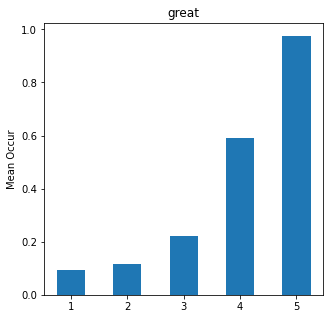

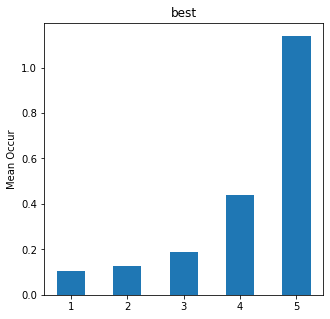

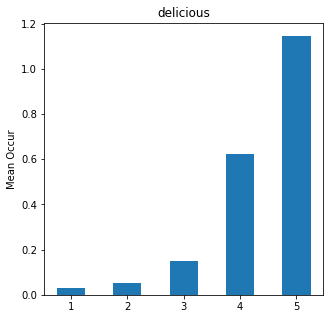

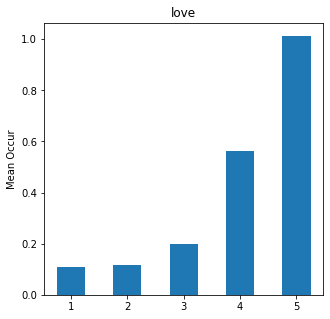

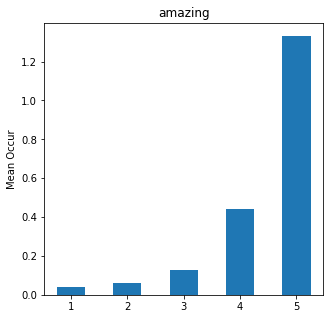

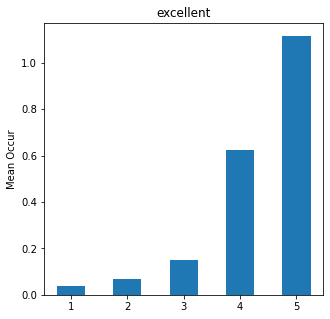

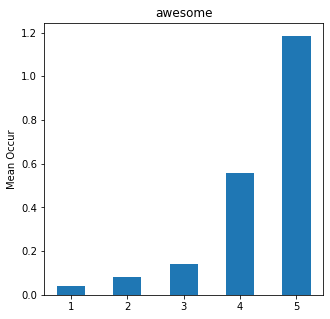

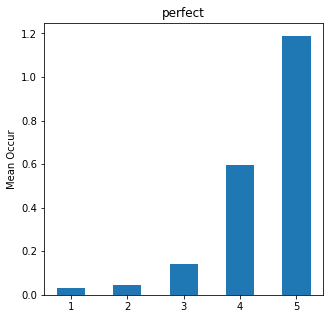

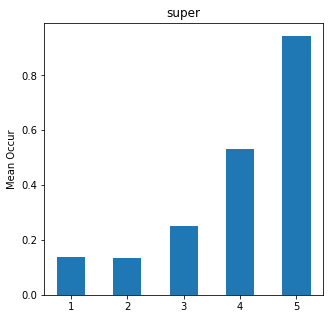

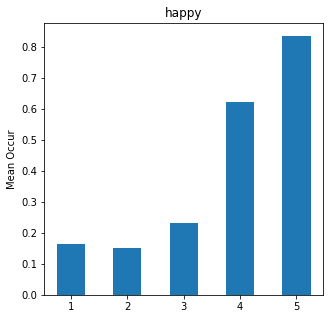

In [37]:
star_distribution_word(pizza_review_business,Positive_Word[0:10])

As you can see, positive words occur more times in 5 stars review than 1 or 2 stars review. 

# Star Distribution of Negative Words

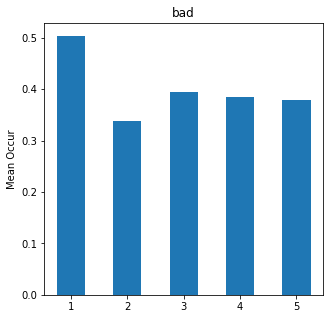

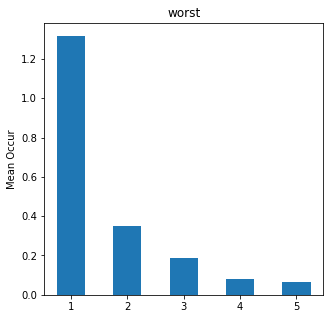

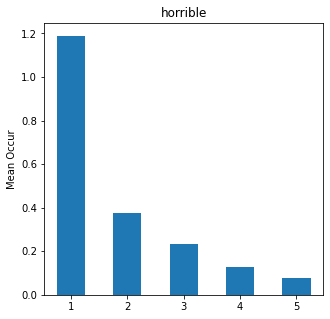

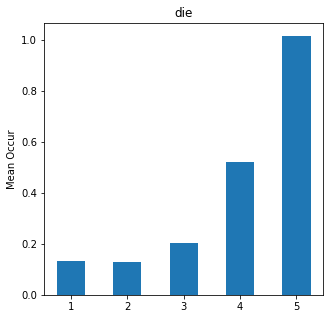

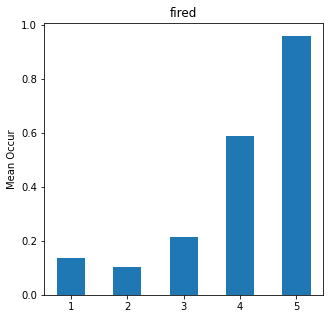

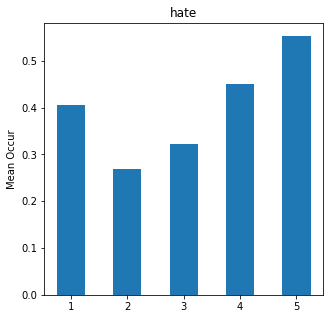

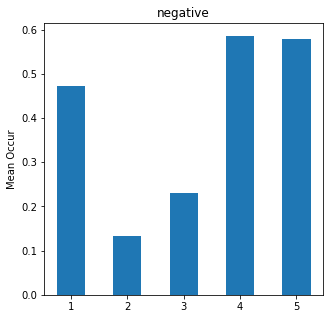

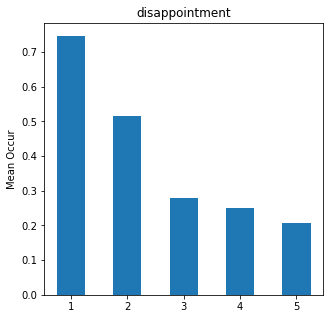

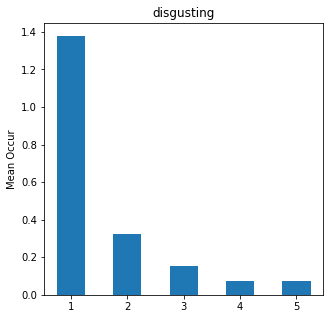

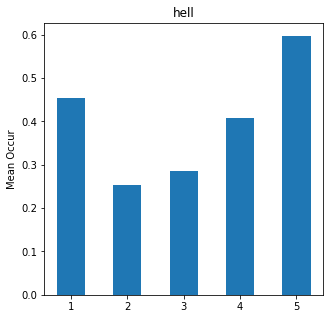

In [38]:
star_distribution_word(pizza_review_business,Negative_Word[0:10])

The occurance of negative words in stars are complex, some words such as disgusting and disappointment occurs more times in 1 star review but negative occurs more time in 1, 4 and 5 stars review.  

# Star Distribution of Foods Words

Now we find words connected with food. 

In [39]:
def food_related_word(i):
    syns = wn.synsets(str(i), pos = wn.NOUN)
    for syn in syns:
        if 'food' in syn.lexname():
            return True
    return False
Food_Word=[]
for i in Word_Freq['Word']:
    if food_related_word(i) == True:
        Food_Word.append(i)

In [40]:
Food_Word

['pizza',
 'food',
 'sauce',
 'cheese',
 'salad',
 'delicious',
 'menu',
 'chicken',
 'beer',
 'table',
 'drink',
 'topping',
 'bread',
 'slice',
 'wing',
 'dinner',
 'meal',
 'taste',
 'side',
 'pasta',
 'lunch',
 'dish',
 'bit',
 'pepperoni',
 'special',
 'sandwich',
 'pie',
 'meatball',
 'wine',
 'sausage',
 'garlic',
 'appetizer',
 'meat',
 'tomato',
 'burger',
 'ingredient',
 'mushroom',
 'pepper',
 'sweet',
 'portion',
 'dough',
 'dessert',
 'must',
 'dressing',
 'onion',
 'soup',
 'steak',
 'bite',
 'white',
 'piece',
 'plate',
 'bacon',
 'game',
 'olive',
 'sub',
 'mozzarella',
 'buffalo',
 'hoagie',
 'green',
 'water',
 'joint',
 'cut',
 'potato',
 'entree',
 'veggie',
 'stick',
 'oil',
 'cream',
 'course',
 'roll',
 'shrimp',
 'parmesan',
 'spinach',
 'date',
 'beef',
 'fish',
 'egg',
 'ice',
 'split',
 'gluten',
 'brunch',
 'marinara',
 'lettuce',
 'breadstick',
 'hoagy',
 'cake',
 'spaghetti',
 'breakfast',
 'pork',
 'cocktail',
 'crisp',
 'basil',
 'chip',
 'lasagna',
 'gy

In [52]:
Food_Word_Data=pd.DataFrame(Food_Word)
Food_Word_Data

0
0         pizza
1          food
2         sauce
3        cheese
4         salad
..          ...
488     sirloin
489  breadcrumb
490  grapefruit
491  tenderloin
492     grouper

[493 rows x 1 columns]

In [53]:
Food_Word_Data.to_csv('data/Food_Word_Data.csv')

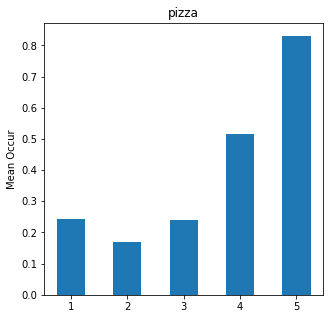

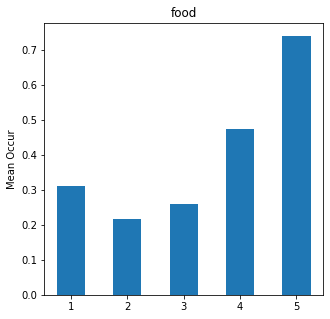

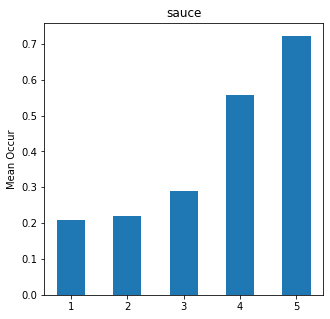

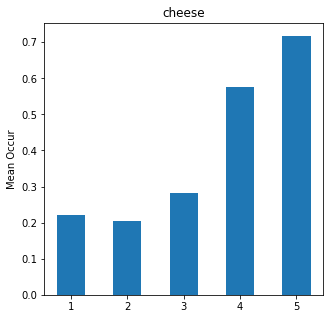

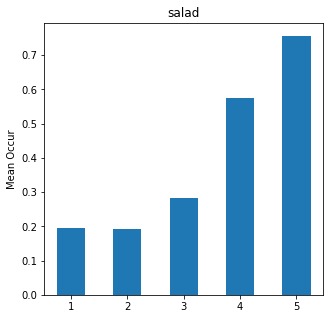

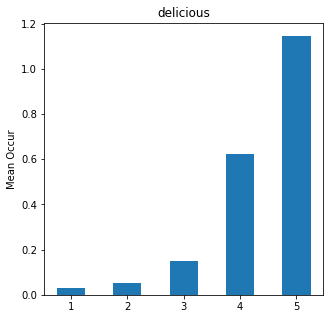

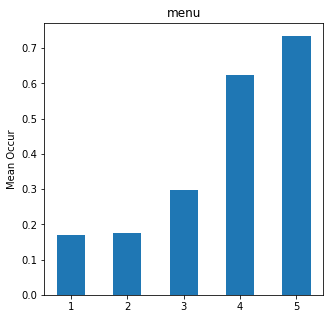

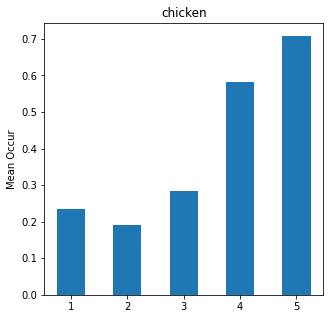

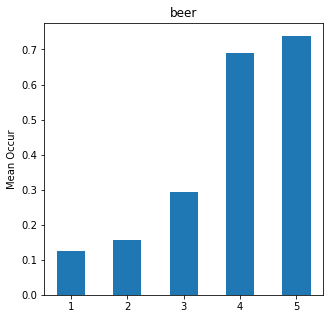

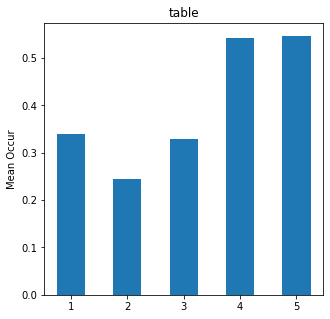

In [41]:
star_distribution_word(pizza_review_business,Food_Word[0:10])

As you can see, most of words occur more time in 4 or 5 stars review.

# Star Distribution of WiFi, Park, Book, TV

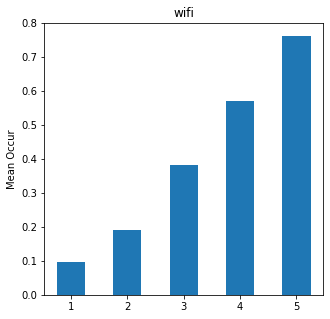

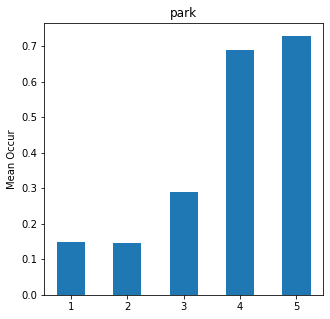

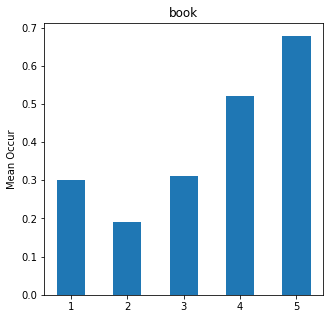

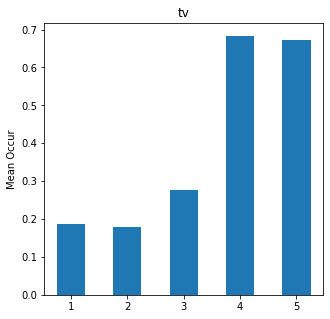

In [42]:
star_distribution_word(pizza_review_business,["wifi","park","book",'tv'])

All four category occurs more time in 4 or 5 stars review. 

# WordCloud

WordCloud tell you how frequency in our txt, the more commonly the term appears, the larger the word appears in the image generated.

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
Up_Four_Stars_Review=pizza_review_business[pizza_review_business["stars"]>=4]
Low_Two_Stars_Review=pizza_review_business[pizza_review_business["stars"]<=2]

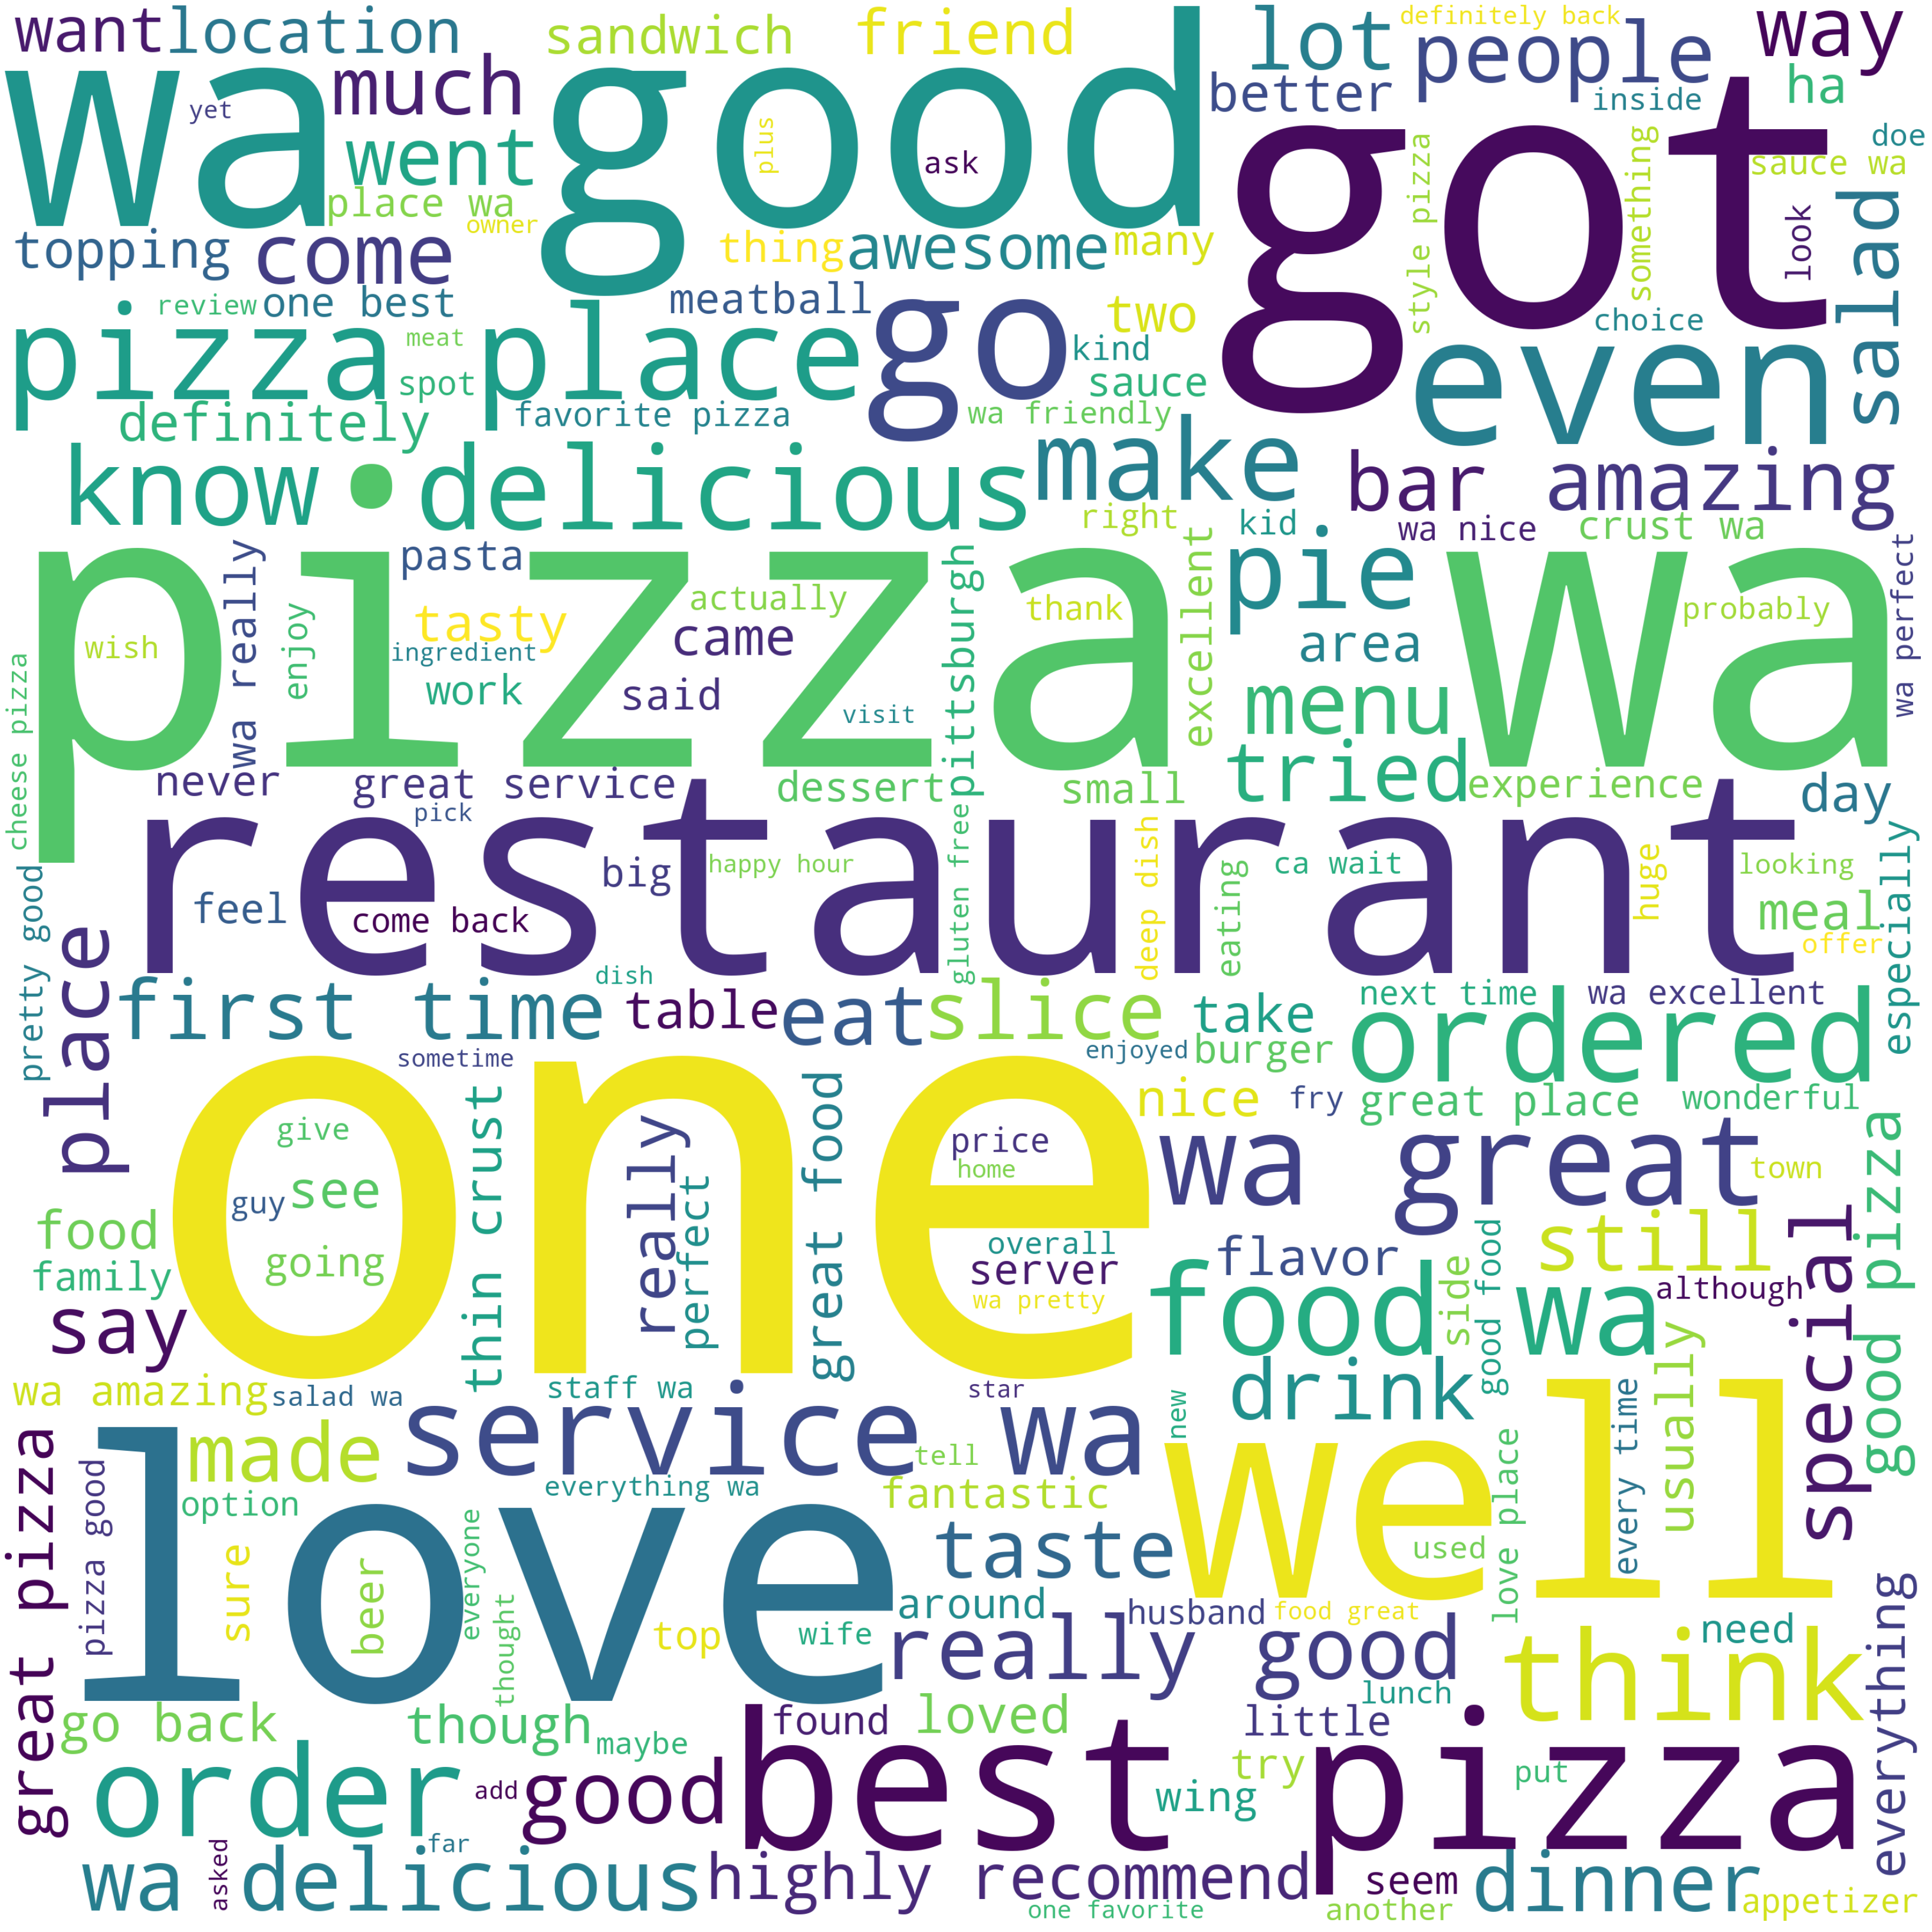

In [45]:
wordcloud = WordCloud(
    width = 3000,
    height = 3000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(" ".join(Up_Four_Stars_Review["clean_review"].tolist()))
fig = plt.figure(
    figsize = (60, 60))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("figure/Positive_Word_Cloud.png")

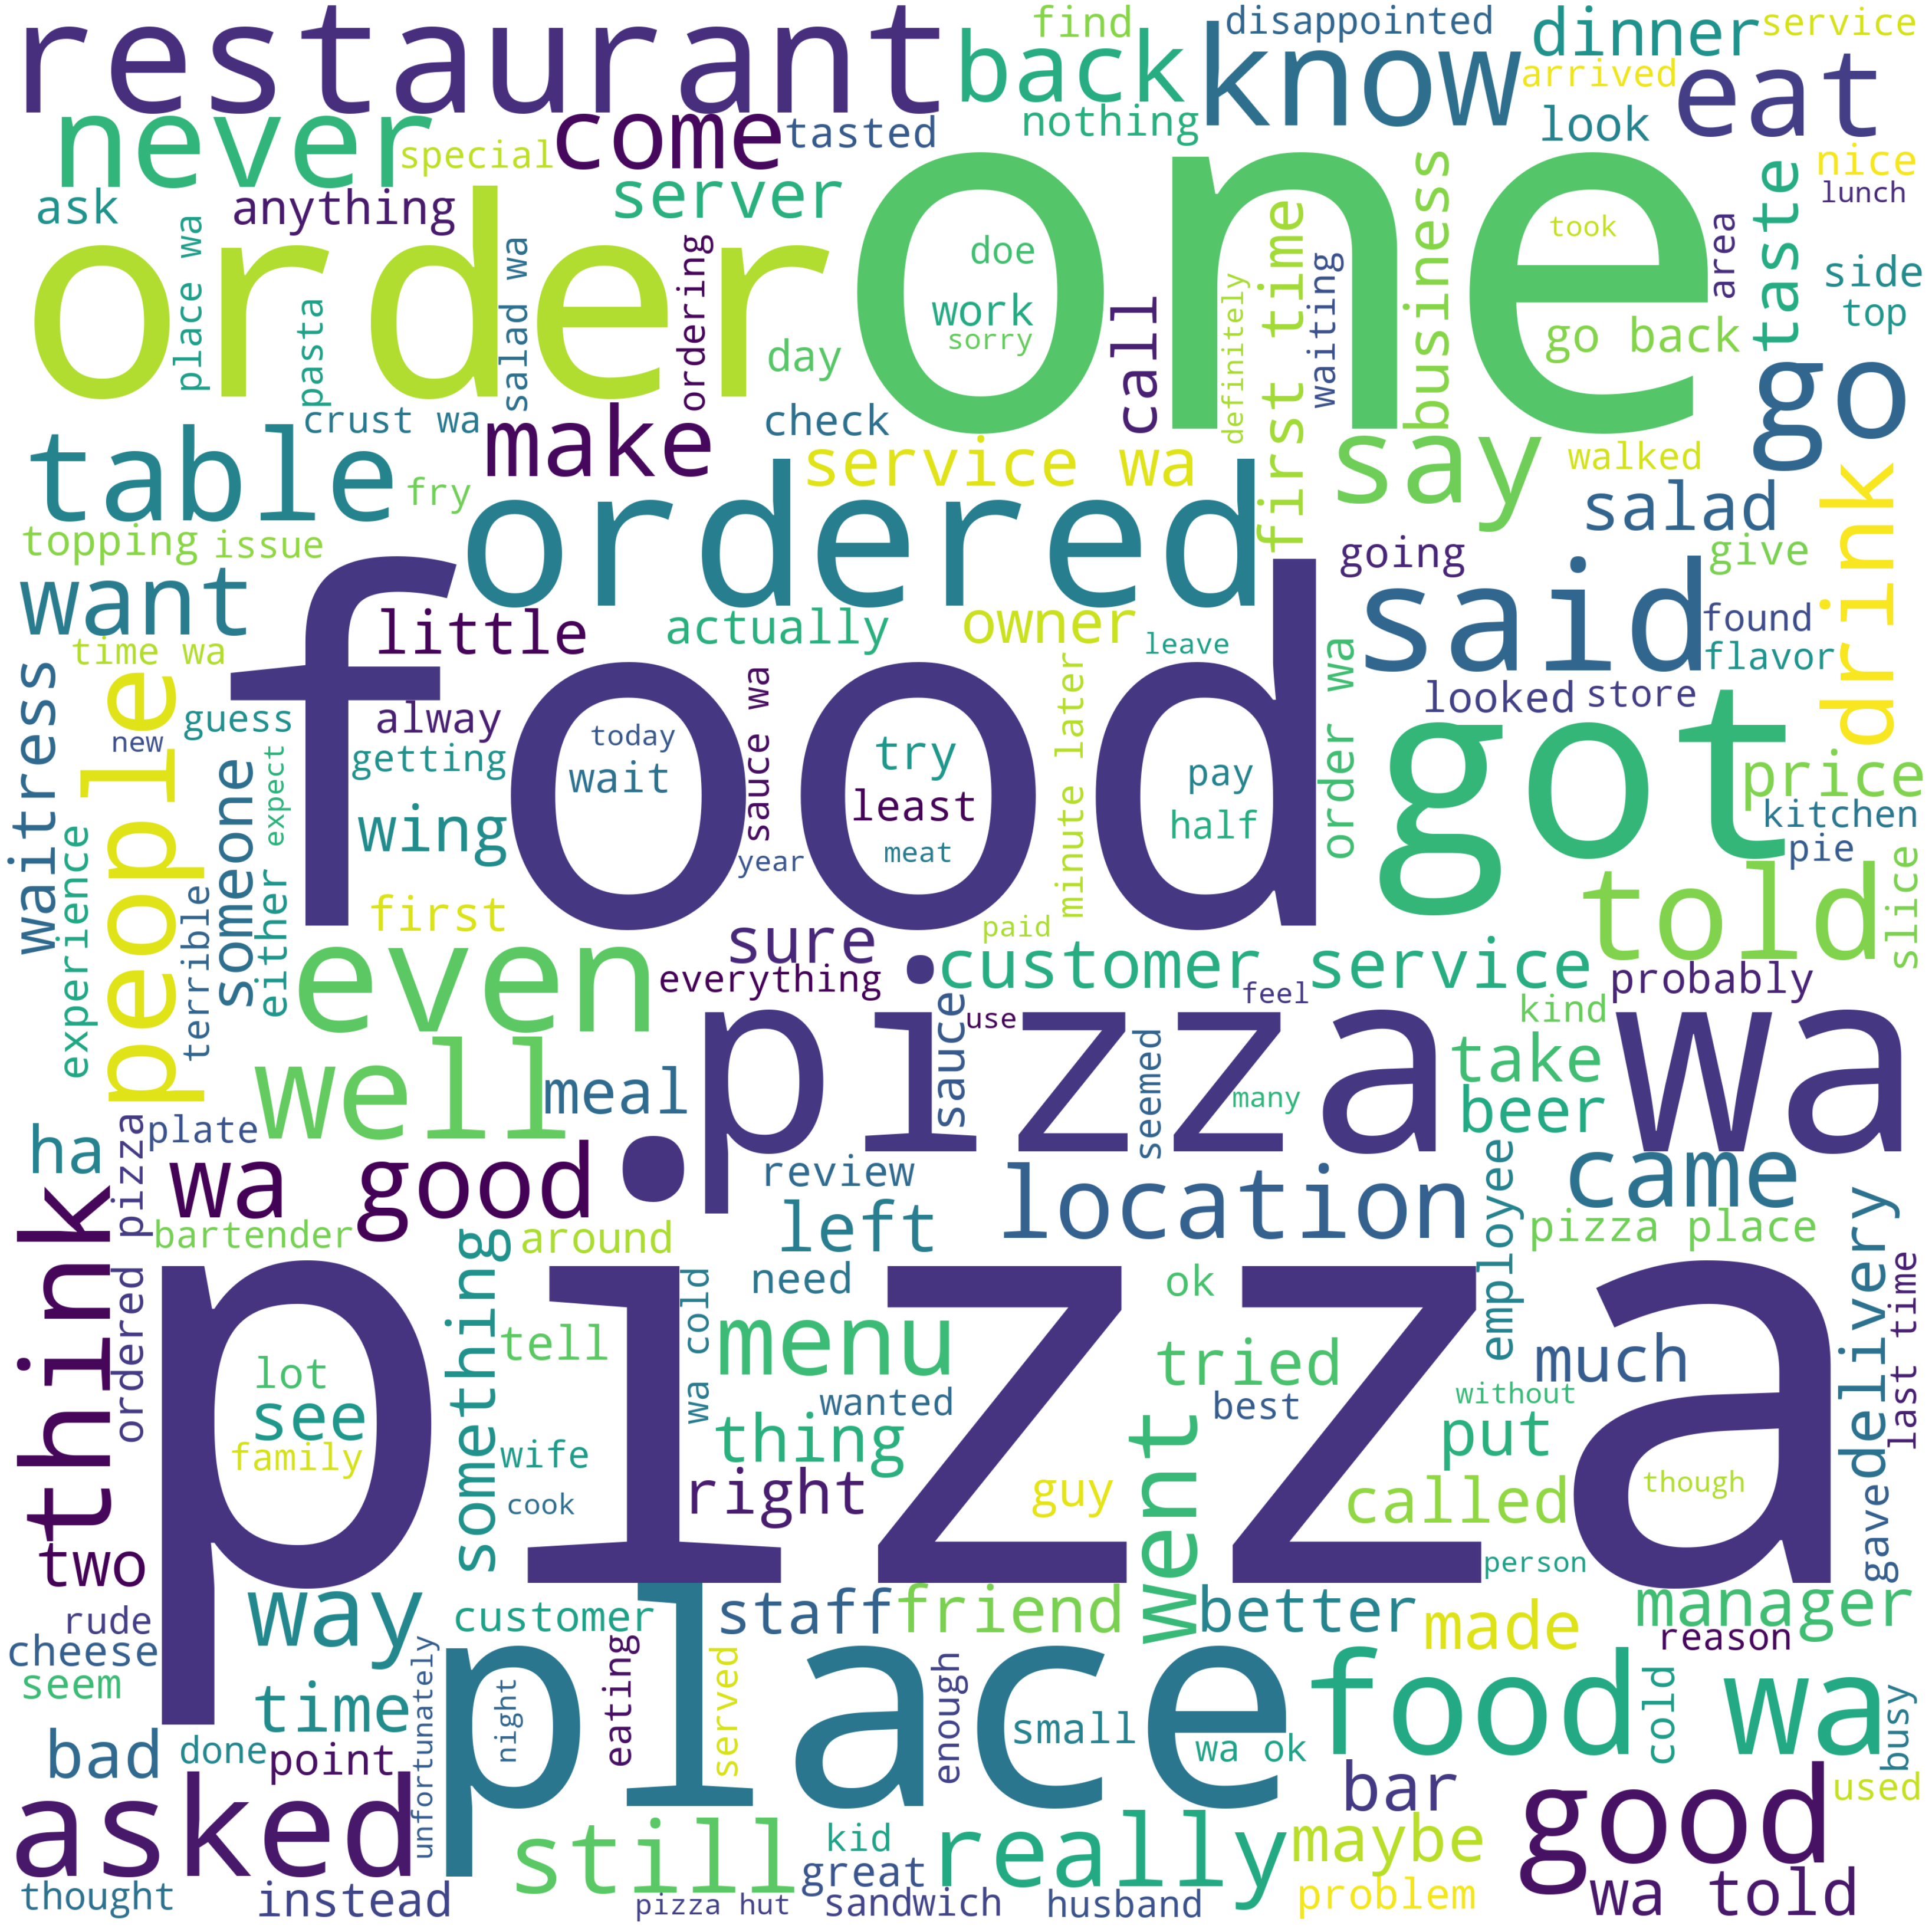

In [46]:
wordcloud = WordCloud(
    width = 3000,
    height = 3000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(" ".join(Low_Two_Stars_Review["clean_review"].tolist()))
fig = plt.figure(
    figsize = (60, 60))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("figure/Negative_Word_Cloud.png")

As you can see,  some words occur many times such as pizza and food in both positive and negative word cloudl. 